In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print('HABILITANDO GPU - DONE')

Found GPU at: /device:GPU:0
HABILITANDO GPU - DONE


In [2]:
!nvidia-smi

Thu Oct  8 21:10:00 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    30W /  70W |    227MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

print('DONE')

Mounted at /content/drive
DONE


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Feature Scaling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import load_svmlight_file
import time

print('DONE')

DONE


In [8]:
def get_time():
    return time.time()


def get_time_diff(start_time):
    end_time = time.time()
    return round_float(end_time - start_time)


def round_float(value):
    return float("{:.3f}".format(value))


def get_num_rows(file):
    return sum(1 for line in open(file))


def generate_hash():
    return f"{get_time():.0f}"


def selecao_feature(X, y):
    print('SHAPE ENTRADA')
    print (X.shape)
    clf = ExtraTreesClassifier(n_estimators=100)
    clf = clf.fit(X,y)
    print("\n FEATURE IMPORTANCE")
    print(clf.feature_importances_)
    model = SelectFromModel(clf,prefit=True)
    X_new = model.transform(X)
    print('\nNEW SHAPE')
    print(X_new.shape)
    return X_new


def print_resultados(classifier, y_test, y_pred, diff_time, X_test, nome):
    print('\nClassifier: ')
    print('\n:::RESULTS:::')
    print("\nMatriz de Confusão: \n", confusion_matrix(y_test,y_pred))
    print("\nClassification Report: \n", classification_report(y_test,y_pred))
    folder = "resultados/cls_report"
    output_file = folder + "/" + get_time() + " - " + nome + ".csv"
    pf = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    pf.transpose
    pf.to_csv(output_file, index=True, header=True)
   
    print(f'\nTempo de Execução: {diff_time} s.')
    #print("\nAcurácia: ", accuracy_score(y_test, y_pred))
    
    accuracy = accuracy_score(y_test, y_pred)
    print("\nAcurácia: : %.2f%%" % (accuracy * 100.0))
    output_file = get_time() + " - " + nome + " - Acurácia: %.2f%%" % (accuracy * 100.0)
    with open("resultados/acuracia/acuracia.txt", "a") as text_file:
        text_file.write(output_file)
        text_file.write("\n")

    mse = mean_squared_error(y_test, classifier.predict(X_test))
    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    
    #print("\nImportância das Características: \n", classifier.feature_importances_)
    #######################################
    # Verificar se está certo Curva ROC #

    #plot_roc_curve(classifier, X_test, y_test) 
    #plt.show()
    ##########################################

    metrics.plot_roc_curve(classifier, X_test, y_test)  # doctest: +SKIP
    folder = "resultados/roc"
    output_file = folder + "/" + get_time() + " - " + nome + ".png"
    plt.savefig(output_file)
    #plt.show()

    metrics.plot_precision_recall_curve(classifier, X_test, y_test)
    folder = "resultados/precision_recall"
    output_file = folder + "/" + get_time() + " - " + nome + ".png"
    plt.savefig(output_file) 
    #plt.show()

    # Plot non-normalized confusion matrix
    titles_options = [("Without Normalization", None),("Normalized", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, X_test, y_test,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)
        folder = "resultados/conf_mat"
        output_file = folder + "/" + get_time() + " - " + nome + "_" + title + ".png"
        plt.savefig(output_file)  
    #plt.show()

In [11]:
FILE_PATH_DRIVE = '/content/drive/My Drive/Colab Notebooks/'

print("Starting Loading Files\n")
x_train, y_train = load_svmlight_file(FILE_PATH_DRIVE + "data/credit_normalized.svmlight")
x_test, y_test = load_svmlight_file(FILE_PATH_DRIVE + "data/test/credit_normalized.svmlight")
x_train = x_train.toarray()
x_test = x_test.toarray()

print('DONE')

Starting Loading Files

DONE


**Selecao Atributos**

In [12]:
X_new = selecao_feature(x_train, y_train)

print('DONE')

SHAPE ENTRADA
(219984, 706)

 FEATURE IMPORTANCE
[2.67431315e-03 5.56902848e-04 1.55527243e-03 9.44383710e-07
 1.23299403e-03 1.28565328e-03 2.31010808e-03 2.17086618e-03
 4.05842097e-03 2.89596409e-03 6.83551642e-04 5.05169700e-04
 7.95136430e-04 8.86455974e-04 1.63314419e-03 2.06108238e-03
 1.84911583e-03 1.45339876e-03 1.12737694e-06 3.12461604e-06
 3.15421349e-06 2.39835751e-06 1.56225782e-03 1.77256305e-03
 2.10638434e-03 1.35220258e-03 1.00029660e-03 1.71548698e-03
 1.59635470e-03 1.63662168e-03 4.19130606e-04 3.80198393e-04
 2.89549282e-04 2.45154734e-04 4.76577216e-05 5.12567804e-05
 9.34029049e-04 9.11439116e-05 4.35332597e-04 4.51776035e-04
 3.24713024e-04 2.62829932e-04 7.37368667e-05 7.26752609e-05
 9.26795080e-04 1.30429931e-04 5.15826498e-04 4.93872323e-04
 3.37121874e-04 3.28033257e-04 8.84002701e-05 9.34788304e-05
 9.72777717e-04 1.68134438e-04 6.00677539e-04 6.14637288e-04
 3.86698844e-04 3.73451177e-04 1.22350045e-04 1.22919473e-04
 1.03747605e-03 2.72534063e-04 7.734

**Gradient Boosting**


Training Shape : (153988, 226)
Testing  Shape : (65996, 226)
The mean squared error (MSE) on test set: 0.1940

:::RESULTS:::

Matriz de Confusão: 
 [[ 1984 11621]
 [ 1179 51212]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.63      0.15      0.24     13605
         1.0       0.82      0.98      0.89     52391

    accuracy                           0.81     65996
   macro avg       0.72      0.56      0.56     65996
weighted avg       0.78      0.81      0.75     65996


Tempo de Execução: 1.582 s.

Acurácia: : 80.60%

Importância das Características: 
 [3.61797950e-02 2.65266313e-02 5.61862854e-02 7.38167418e-02
 5.01409207e-02 0.00000000e+00 0.00000000e+00 1.37570992e-04
 0.00000000e+00 2.47484508e-06 0.00000000e+00 0.00000000e+00
 1.43441240e-02 8.35871726e-04 4.11154377e-03 1.58969273e-03
 2.81002675e-03 3.23817609e-04 7.33966942e-03 2.79017486e-03
 2.32284895e-03 1.45451387e-03 8.76476075e-04 5.45398072e-04
 1.94497803e-03 

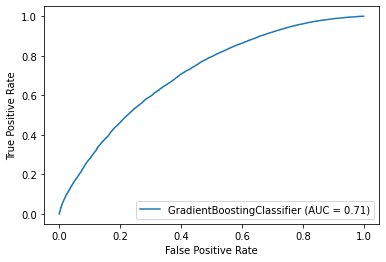

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Feature Scaling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

# split data into train and test sets
seed = 0
test_size = 0.3
n_estimators = 200

X_train, X_test, y_train, y_test = train_test_split(X_new, y_train, test_size=test_size, random_state=seed)

#shapes
print('\nTraining Shape :',X_train.shape)
print('Testing  Shape :',X_test.shape)

# fit model no training data
#Parâmetros: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
model = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, random_state=0, n_estimators=n_estimators)
model.fit(X_train, y_train)

start_time = get_time() # Tempo inicial

mse = mean_squared_error(y_test, model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

#test_score = np.zeros((n_estimators,), dtype=np.float64)

#for i, y_pred in enumerate(model.staged_predict(X_test)):
#    test_score[i] = model.loss_(y_test, y_pred)
    #print ('Test Score: '+ str(test_score[i]))

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

diff_time = get_time_diff(start_time) # Tempo final

print_resultados(model, y_test, predictions, diff_time, X_test)